In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import pickle

%matplotlib inline

In [2]:
tfid = TfidfVectorizer()

OVERVIEW
Read and analyze the data

#### READING AND ANALYZING THE DATA

In [3]:

christain_tv = pd.read_csv('c_tvshow.csv')
christain_movies = pd.read_csv('c_movies.csv')

In [4]:
christain_movies

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,keywords,keywords_list,keyword_ids,soup
0,False,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,[27],807172,en,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",677.968,/lxRLC3WOFM2INoyEa3bFGIUApvn.jpg,2023-10-04,The Exorcist: Believer,False,5.4,138.0,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...","['exorcism', 'faith', 'sequel', 'possession', ...","[2626, 6150, 9663, 9712, 10941, 157213, 159940...",The Exorcist: Believer horror When his daughte...
1,False,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,[27],9552,en,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,231.878,/4ucLGcXVVSVnsfkGtbLY4XAius8.jpg,1973-12-26,The Exorcist,False,7.7,7332.0,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...","['exorcism', 'holywater', 'religionandsupernat...","[2626, 3649, 3684, 5569, 9712, 10093, 10112, 1...",The Exorcist horror 12-year-old Regan MacNeil ...
2,False,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,"[18, 36, 10752]",324786,en,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",136.653,/jcStBvbQt78tPeId5hC7a9jcDOK.jpg,2016-10-07,Hacksaw Ridge,False,8.2,12737.0,"['drama', 'history', 'war']","[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...","['japan', 'worldwarii', 'violentfather', 'paci...","[233, 1956, 2299, 2821, 3036, 5565, 8676, 8997...",Hacksaw Ridge drama history war WWII American ...
3,False,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,"[16, 10751]",38757,en,Tangled,When the kingdom's most wanted-and most charmi...,117.564,/ym7Kst6a4uodryxqbGOxmewF235.jpg,2010-11-24,Tangled,False,7.6,10588.0,"['animation', 'family']","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","['hostage', 'magic', 'horse', 'fairytale', 'mu...","[1562, 2343, 2673, 3205, 4344, 6946, 7376, 337...",Tangled animation family When the kingdom's mo...
4,False,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,"[18, 14]",345938,en,The Shack,"After suffering a family tragedy, Mack Phillip...",115.397,/doAzav9kfdtsoSdw1MDFvjKq3J4.jpg,2017-03-03,The Shack,False,7.5,1972.0,"['drama', 'fantasy']","[{'id': 186, 'name': 'christianity'}, {'id': 6...","['christianity', 'lossoflovedone', 'basedonnov...","[186, 697, 818, 33720, 164881, 233107, 253695,...",The Shack drama fantasy After suffering a fami...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,False,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,[35],13590,en,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,0.600,/4FlC7a3iG9WhTTuaiE1SiF5INal.jpg,1997-11-17,Eddie Izzard: Glorious,False,7.0,41.0,['comedy'],"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '...","['bible', 'stand-upcomedy', 'concertfilm', 'ol...","[3036, 9716, 156205, 186756, 186915]",Eddie Izzard: Glorious comedy Eddie Izzard's r...
1676,False,NaN,[99],8644,en,Die Menschenfischer,NaN,0.600,NaN,2004-10-19,Die Menschenfischer,False,0.0,0.0,['documentary'],"[{'id': 242, 'name': 'new york city'}, {'id': ...","['newyorkcity', 'pastor', 'parish', 'baptism',...","[242, 1499, 4637, 5651, 6150]",Die Menschenfischer documentary newyorkcity p...
1677,False,NaN,[35],5930,de,Wir fahren mit der U-Bahn nach St. Pauli,NaN,0.600,NaN,1970-10-22,Wir fahren mit der U-Bahn nach St. Pauli,False,0.0,0.0,['comedy'],"[{'id': 1552, 'name': 'subway'}, {'id': 7116, ...","['subway', 'st.pauli']","[1552, 7116]",Wir fahren mit der U-Bahn nach St. Pauli comed...
1678,False,NaN,[35],5912,de,Zwei Bayern in St. Pauli,NaN,0.600,NaN,1956-11-27,Zwei Bayern in St. Pauli,False,0.0,0.0,['comedy'],"[{'id': 7116, 'name': 'st. pauli'}]",['st.pauli'],[7116],Zwei Bayern in St. Pauli comedy st.pauli


### CHRISTAIN MOVIES CONTENT RECOMMENDATION 

In [5]:
christain_movies.head(3)

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count,genres,keywords,keywords_list,keyword_ids,soup
0,False,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,[27],807172,en,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",677.968,/lxRLC3WOFM2INoyEa3bFGIUApvn.jpg,2023-10-04,The Exorcist: Believer,False,5.4,138.0,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...","['exorcism', 'faith', 'sequel', 'possession', ...","[2626, 6150, 9663, 9712, 10941, 157213, 159940...",The Exorcist: Believer horror When his daughte...
1,False,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,[27],9552,en,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,231.878,/4ucLGcXVVSVnsfkGtbLY4XAius8.jpg,1973-12-26,The Exorcist,False,7.7,7332.0,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...","['exorcism', 'holywater', 'religionandsupernat...","[2626, 3649, 3684, 5569, 9712, 10093, 10112, 1...",The Exorcist horror 12-year-old Regan MacNeil ...
2,False,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,"[18, 36, 10752]",324786,en,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",136.653,/jcStBvbQt78tPeId5hC7a9jcDOK.jpg,2016-10-07,Hacksaw Ridge,False,8.2,12737.0,"['drama', 'history', 'war']","[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...","['japan', 'worldwarii', 'violentfather', 'paci...","[233, 1956, 2299, 2821, 3036, 5565, 8676, 8997...",Hacksaw Ridge drama history war WWII American ...


## I will be using the unprocecessed data so you can lean how it is done

In [6]:
column_to_use = ['backdrop_path', 'id','original_title','overview','vote_average','genres','keywords']

In [7]:
christain_movies['soup'][0]

"The Exorcist: Believer horror When his daughter, Angela, and her friend Katherine, show signs of demonic possession, it unleashes a chain of events that forces single father Victor Fielding to confront the nadir of evil. Terrified and desperate, he seeks out Chris MacNeil, the only person alive who's witnessed anything like it before. exorcism faith sequel possession disappearance deathofmother exorcist reboot demonicpossession fatherdaughterrelationship legacycharacter"

In [8]:
christain_movies['keywords'][0]


"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150, 'name': 'faith'}, {'id': 9663, 'name': 'sequel'}, {'id': 9712, 'name': 'possession'}, {'id': 10941, 'name': 'disappearance'}, {'id': 157213, 'name': 'death of mother'}, {'id': 159940, 'name': 'exorcist'}, {'id': 161184, 'name': 'reboot'}, {'id': 161261, 'name': 'demonic possession'}, {'id': 240303, 'name': 'father daughter relationship'}, {'id': 250732, 'name': 'legacy character'}]"

In [9]:
christain_movies.describe()

,id,popularity,vote_average,vote_count
count,1.680000e+03,1679.000000,1679.000000,1679.000000
mean,4.341281e+05,5.867799,4.291066,238.969029
std,3.608858e+05,21.095356,3.273071,1103.622774
min,8.500000e+01,0.600000,0.000000,0.000000
25%,8.921925e+04,0.600000,0.000000,0.000000
50%,3.675380e+05,1.235000,5.400000,2.000000
75%,6.995950e+05,4.025500,6.900000,21.000000
max,1.194599e+06,677.968000,10.000000,12737.000000


In [10]:
christain_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              1680 non-null   bool   
 1   backdrop_path      1011 non-null   object 
 2   genre_ids          1680 non-null   object 
 3   id                 1680 non-null   int64  
 4   original_language  1680 non-null   object 
 5   original_title     1680 non-null   object 
 6   overview           1600 non-null   object 
 7   popularity         1679 non-null   float64
 8   poster_path        1519 non-null   object 
 9   release_date       1627 non-null   object 
 10  title              1679 non-null   object 
 11  video              1679 non-null   object 
 12  vote_average       1679 non-null   float64
 13  vote_count         1679 non-null   float64
 14  genres             1650 non-null   object 
 15  keywords           1679 non-null   object 
 16  keywords_list      1679 

In [11]:
christain_movies['adult'].value_counts()
christain_movies['original_language'].value_counts().count()

47

<Axes: >

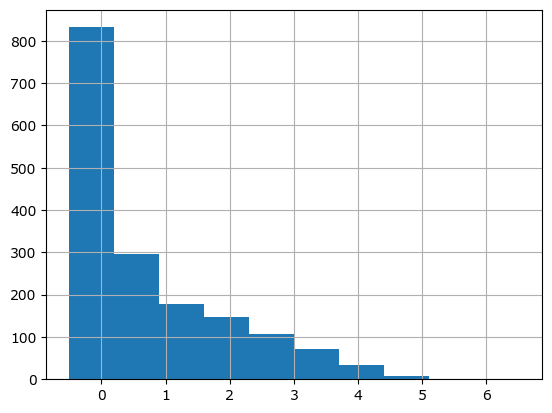

In [12]:
np.log(christain_movies['popularity']).hist()

In [13]:
christain_movies['video'].value_counts()

video
False    1679
Name: count, dtype: int64

<Axes: >

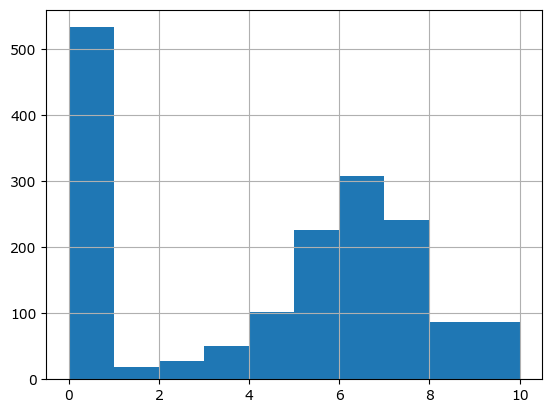

In [14]:
christain_movies['vote_average'].hist()
#remove outlier using vote average

#### We have some outliers which we might remove later on

<Axes: >

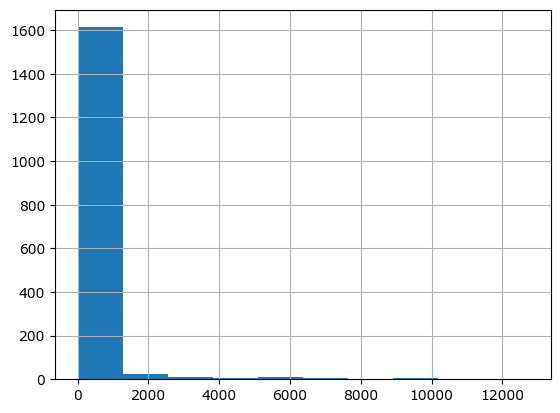

In [15]:
christain_movies['vote_count'].hist()

##### I would not be using it because of the distribuition

#### FEATURE ENGINEERING

In [16]:
movie_data = christain_movies[column_to_use]

In [17]:
movie_data

,backdrop_path,id,original_title,overview,vote_average,genres,keywords
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150..."
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649..."
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,"['drama', 'history', 'war']","[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n..."
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,"['animation', 'family']","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,..."
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,"['drama', 'fantasy']","[{'id': 186, 'name': 'christianity'}, {'id': 6..."
...,...,...,...,...,...,...,...
1675,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,['comedy'],"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '..."
1676,NaN,8644,Die Menschenfischer,NaN,0.0,['documentary'],"[{'id': 242, 'name': 'new york city'}, {'id': ..."
1677,NaN,5930,Wir fahren mit der U-Bahn nach St. Pauli,NaN,0.0,['comedy'],"[{'id': 1552, 'name': 'subway'}, {'id': 7116, ..."
1678,NaN,5912,Zwei Bayern in St. Pauli,NaN,0.0,['comedy'],"[{'id': 7116, 'name': 'st. pauli'}]"


#### Remove NAN values

In [18]:
movie_data.duplicated().sum()

0

In [19]:
movie_data.dropna(subset=['overview','keywords','genres'],inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_12700\1677622353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data.dropna(subset=['overview','keywords','genres'],inplace=True)


In [20]:
movie_data.reset_index(drop=True)

,backdrop_path,id,original_title,overview,vote_average,genres,keywords
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150..."
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649..."
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,"['drama', 'history', 'war']","[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n..."
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,"['animation', 'family']","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,..."
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,"['drama', 'fantasy']","[{'id': 186, 'name': 'christianity'}, {'id': 6..."
...,...,...,...,...,...,...,...
1567,NaN,54461,Holy Water-Gate: Abuse Cover-up in the Catholi...,The film begins as a personal journey of filmm...,0.0,['documentary'],"[{'id': 157008, 'name': 'catholic church'}, {'..."
1568,NaN,50054,Dating Fossils and Rocks,"In this DVD, Mr. Riddle shares the results of ...",0.0,"['documentary', 'history']","[{'id': 2878, 'name': 'scientific study'}, {'i..."
1569,NaN,48547,The Restoration,This film recounts how Joseph Smith's search f...,5.7,"['drama', 'romance', 'family']","[{'id': 4087, 'name': 'revelation'}, {'id': 61..."
1570,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,['comedy'],"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '..."


In [21]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1572 entries, 0 to 1679
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   backdrop_path   972 non-null    object 
 1   id              1572 non-null   int64  
 2   original_title  1572 non-null   object 
 3   overview        1572 non-null   object 
 4   vote_average    1572 non-null   float64
 5   genres          1572 non-null   object 
 6   keywords        1572 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 98.2+ KB


#### LET US START WITH KEYWORDS

In [22]:
random_word = movie_data['keywords'][0]
random_word

"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150, 'name': 'faith'}, {'id': 9663, 'name': 'sequel'}, {'id': 9712, 'name': 'possession'}, {'id': 10941, 'name': 'disappearance'}, {'id': 157213, 'name': 'death of mother'}, {'id': 159940, 'name': 'exorcist'}, {'id': 161184, 'name': 'reboot'}, {'id': 161261, 'name': 'demonic possession'}, {'id': 240303, 'name': 'father daughter relationship'}, {'id': 250732, 'name': 'legacy character'}]"

In [23]:
def get_names_from_keywords(movie_details):
    movie_details = ast.literal_eval(movie_details) ## change string to list
    movie_keywords= []
    for movie_detail in movie_details:
        
        movie_keywords.append(movie_detail['name'])
    return movie_keywords


get_names_from_keywords(random_word)

['exorcism',
 'faith',
 'sequel',
 'possession',
 'disappearance',
 'death of mother',
 'exorcist',
 'reboot',
 'demonic possession',
 'father daughter relationship',
 'legacy character']

In [24]:
movie_data['keyword_list'] = movie_data['keywords'].apply(lambda x :get_names_from_keywords(x))

C:\Users\USER\AppData\Local\Temp\ipykernel_12700\1301020118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['keyword_list'] = movie_data['keywords'].apply(lambda x :get_names_from_keywords(x))


In [25]:
movie_data

,backdrop_path,id,original_title,overview,vote_average,genres,keywords,keyword_list
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...","[exorcism, faith, sequel, possession, disappea..."
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,['horror'],"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...","[exorcism, holy water, religion and supernatur..."
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,"['drama', 'history', 'war']","[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...","[japan, world war ii, violent father, pacifism..."
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,"['animation', 'family']","[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...","[hostage, magic, horse, fairy tale, musical, b..."
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,"['drama', 'fantasy']","[{'id': 186, 'name': 'christianity'}, {'id': 6...","[christianity, loss of loved one, based on nov..."
...,...,...,...,...,...,...,...,...
1669,NaN,54461,Holy Water-Gate: Abuse Cover-up in the Catholi...,The film begins as a personal journey of filmm...,0.0,['documentary'],"[{'id': 157008, 'name': 'catholic church'}, {'...","[catholic church, abuse]"
1670,NaN,50054,Dating Fossils and Rocks,"In this DVD, Mr. Riddle shares the results of ...",0.0,"['documentary', 'history']","[{'id': 2878, 'name': 'scientific study'}, {'i...","[scientific study, bible, natural history]"
1671,NaN,48547,The Restoration,This film recounts how Joseph Smith's search f...,5.7,"['drama', 'romance', 'family']","[{'id': 4087, 'name': 'revelation'}, {'id': 61...","[revelation, prayer, god, vision, 19th century..."
1675,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,['comedy'],"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '...","[bible, stand-up comedy, concert film, old tes..."


In [26]:
movie_data['genres'][0]

"['horror']"

Let us append keyword listm genres, and overview together,butvfirstly we are going to turn genres and keyword list toggether

In [27]:
movie_data['keyword_list'] = movie_data['keyword_list'].apply(lambda x :" ".join(x))


C:\Users\USER\AppData\Local\Temp\ipykernel_12700\2609996218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['keyword_list'] = movie_data['keyword_list'].apply(lambda x :" ".join(x))


In [28]:
movie_data.loc[:, 'genres'] = movie_data['genres'].apply(lambda x : " ".join(ast.literal_eval(x)))

In [29]:
movie_data

,backdrop_path,id,original_title,overview,vote_average,genres,keywords,keyword_list
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...",exorcism faith sequel possession disappearance...
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...",exorcism holy water religion and supernatural ...
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,drama history war,"[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...",japan world war ii violent father pacifism bib...
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,animation family,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",hostage magic horse fairy tale musical blonde ...
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,drama fantasy,"[{'id': 186, 'name': 'christianity'}, {'id': 6...",christianity loss of loved one based on novel ...
...,...,...,...,...,...,...,...,...
1669,NaN,54461,Holy Water-Gate: Abuse Cover-up in the Catholi...,The film begins as a personal journey of filmm...,0.0,documentary,"[{'id': 157008, 'name': 'catholic church'}, {'...",catholic church abuse
1670,NaN,50054,Dating Fossils and Rocks,"In this DVD, Mr. Riddle shares the results of ...",0.0,documentary history,"[{'id': 2878, 'name': 'scientific study'}, {'i...",scientific study bible natural history
1671,NaN,48547,The Restoration,This film recounts how Joseph Smith's search f...,5.7,drama romance family,"[{'id': 4087, 'name': 'revelation'}, {'id': 61...",revelation prayer god vision 19th century jesu...
1675,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,comedy,"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '...",bible stand-up comedy concert film old testame...


In [30]:
movie_data['all_details'] = movie_data['overview'] + ' ' + movie_data['keyword_list'] + ' ' + movie_data['genres']

C:\Users\USER\AppData\Local\Temp\ipykernel_12700\1721479383.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['all_details'] = movie_data['overview'] + ' ' + movie_data['keyword_list'] + ' ' + movie_data['genres']


In [31]:
movie_data

,backdrop_path,id,original_title,overview,vote_average,genres,keywords,keyword_list,all_details
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...",exorcism faith sequel possession disappearance...,"When his daughter, Angela, and her friend Kath..."
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...",exorcism holy water religion and supernatural ...,12-year-old Regan MacNeil begins to adapt an e...
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,drama history war,"[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...",japan world war ii violent father pacifism bib...,"WWII American Army Medic Desmond T. Doss, who ..."
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,animation family,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",hostage magic horse fairy tale musical blonde ...,When the kingdom's most wanted-and most charmi...
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,drama fantasy,"[{'id': 186, 'name': 'christianity'}, {'id': 6...",christianity loss of loved one based on novel ...,"After suffering a family tragedy, Mack Phillip..."
...,...,...,...,...,...,...,...,...,...
1669,NaN,54461,Holy Water-Gate: Abuse Cover-up in the Catholi...,The film begins as a personal journey of filmm...,0.0,documentary,"[{'id': 157008, 'name': 'catholic church'}, {'...",catholic church abuse,The film begins as a personal journey of filmm...
1670,NaN,50054,Dating Fossils and Rocks,"In this DVD, Mr. Riddle shares the results of ...",0.0,documentary history,"[{'id': 2878, 'name': 'scientific study'}, {'i...",scientific study bible natural history,"In this DVD, Mr. Riddle shares the results of ..."
1671,NaN,48547,The Restoration,This film recounts how Joseph Smith's search f...,5.7,drama romance family,"[{'id': 4087, 'name': 'revelation'}, {'id': 61...",revelation prayer god vision 19th century jesu...,This film recounts how Joseph Smith's search f...
1675,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,comedy,"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '...",bible stand-up comedy concert film old testame...,Eddie Izzard's routine has a loose trajectory ...


In [32]:
data_needed = ['id','vote_average','all_details']
needed_data = movie_data[data_needed].fillna(" ")

In [33]:
needed_data

,id,vote_average,all_details
0,807172,5.4,"When his daughter, Angela, and her friend Kath..."
1,9552,7.7,12-year-old Regan MacNeil begins to adapt an e...
2,324786,8.2,"WWII American Army Medic Desmond T. Doss, who ..."
3,38757,7.6,When the kingdom's most wanted-and most charmi...
4,345938,7.5,"After suffering a family tragedy, Mack Phillip..."
...,...,...,...
1669,54461,0.0,The film begins as a personal journey of filmm...
1670,50054,0.0,"In this DVD, Mr. Riddle shares the results of ..."
1671,48547,5.7,This film recounts how Joseph Smith's search f...
1675,13590,7.0,Eddie Izzard's routine has a loose trajectory ...


### PREPROCESSING OF DATA

In [34]:
scaler = StandardScaler()

In [35]:
needed_data['all_details'] = needed_data['all_details'].apply(lambda x : x.lower())## lower column before vectorizing

In [36]:
needed_data

,id,vote_average,all_details
0,807172,5.4,"when his daughter, angela, and her friend kath..."
1,9552,7.7,12-year-old regan macneil begins to adapt an e...
2,324786,8.2,"wwii american army medic desmond t. doss, who ..."
3,38757,7.6,when the kingdom's most wanted-and most charmi...
4,345938,7.5,"after suffering a family tragedy, mack phillip..."
...,...,...,...
1669,54461,0.0,the film begins as a personal journey of filmm...
1670,50054,0.0,"in this dvd, mr. riddle shares the results of ..."
1671,48547,5.7,this film recounts how joseph smith's search f...
1675,13590,7.0,eddie izzard's routine has a loose trajectory ...


In [37]:
tfid = TfidfVectorizer(min_df =3, max_features = None, strip_accents = 'unicode', analyzer = 'word', ngram_range=(1,3), stop_words ='english')

In [38]:
needed_data['all_details'][0]

"when his daughter, angela, and her friend katherine, show signs of demonic possession, it unleashes a chain of events that forces single father victor fielding to confront the nadir of evil. terrified and desperate, he seeks out chris macneil, the only person alive who's witnessed anything like it before. exorcism faith sequel possession disappearance death of mother exorcist reboot demonic possession father daughter relationship legacy character horror"

In [39]:
vectorized_data = tfid.fit_transform(needed_data['all_details'])

In [40]:
vectorized_data

<1572x5425 sparse matrix of type '<class 'numpy.float64'>'
	with 55308 stored elements in Compressed Sparse Row format>

In [41]:
final_matrix = pd.concat([needed_data['vote_average'].reset_index(drop=True), pd.DataFrame(vectorized_data.toarray())], axis=1)

In [42]:
final_matrix

,vote_average,0,1,2,3,4,5,6,7,8,...,5415,5416,5417,5418,5419,5420,5421,5422,5423,5424
0,5.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,5.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## CORELLATION

In [43]:
from sklearn.metrics.pairwise import sigmoid_kernel



In [44]:
sig = sigmoid_kernel(final_matrix, final_matrix)

In [50]:
with open('myarray.pkl', 'wb') as file:
    pickle.dump(sig,file)

In [ ]:
movie_data

,backdrop_path,id,original_title,overview,vote_average,genres,keywords,keyword_list,all_details
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...",exorcism faith sequel possession disappearance...,"When his daughter, Angela, and her friend Kath..."
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...",exorcism holy water religion and supernatural ...,12-year-old Regan MacNeil begins to adapt an e...
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,drama history war,"[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...",japan world war ii violent father pacifism bib...,"WWII American Army Medic Desmond T. Doss, who ..."
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,animation family,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",hostage magic horse fairy tale musical blonde ...,When the kingdom's most wanted-and most charmi...
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,drama fantasy,"[{'id': 186, 'name': 'christianity'}, {'id': 6...",christianity loss of loved one based on novel ...,"After suffering a family tragedy, Mack Phillip..."
...,...,...,...,...,...,...,...,...,...
1669,NaN,54461,Holy Water-Gate: Abuse Cover-up in the Catholi...,The film begins as a personal journey of filmm...,0.0,documentary,"[{'id': 157008, 'name': 'catholic church'}, {'...",catholic church abuse,The film begins as a personal journey of filmm...
1670,NaN,50054,Dating Fossils and Rocks,"In this DVD, Mr. Riddle shares the results of ...",0.0,documentary history,"[{'id': 2878, 'name': 'scientific study'}, {'i...",scientific study bible natural history,"In this DVD, Mr. Riddle shares the results of ..."
1671,NaN,48547,The Restoration,This film recounts how Joseph Smith's search f...,5.7,drama romance family,"[{'id': 4087, 'name': 'revelation'}, {'id': 61...",revelation prayer god vision 19th century jesu...,This film recounts how Joseph Smith's search f...
1675,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,comedy,"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '...",bible stand-up comedy concert film old testame...,Eddie Izzard's routine has a loose trajectory ...


In [ ]:
movie_data.reset_index(drop=True)

,backdrop_path,id,original_title,overview,vote_average,genres,keywords,keyword_list,all_details
0,/o6kfGs1qTAaFX22YitIvlYMyeqA.jpg,807172,The Exorcist: Believer,"When his daughter, Angela, and her friend Kath...",5.4,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 6150...",exorcism faith sequel possession disappearance...,"When his daughter, Angela, and her friend Kath..."
1,/xcjJ5khg2yzOa282mza39Lbrm7j.jpg,9552,The Exorcist,12-year-old Regan MacNeil begins to adapt an e...,7.7,horror,"[{'id': 2626, 'name': 'exorcism'}, {'id': 3649...",exorcism holy water religion and supernatural ...,12-year-old Regan MacNeil begins to adapt an e...
2,/yQIBS8B9l2qXoPoPtxSXvH7CfoT.jpg,324786,Hacksaw Ridge,"WWII American Army Medic Desmond T. Doss, who ...",8.2,drama history war,"[{'id': 233, 'name': 'japan'}, {'id': 1956, 'n...",japan world war ii violent father pacifism bib...,"WWII American Army Medic Desmond T. Doss, who ..."
3,/cWczNud8Y8i8ab0Z4bxos4myWYO.jpg,38757,Tangled,When the kingdom's most wanted-and most charmi...,7.6,animation family,"[{'id': 1562, 'name': 'hostage'}, {'id': 2343,...",hostage magic horse fairy tale musical blonde ...,When the kingdom's most wanted-and most charmi...
4,/bAup7FGUlmNVOuhZFlLgmDPo0Eg.jpg,345938,The Shack,"After suffering a family tragedy, Mack Phillip...",7.5,drama fantasy,"[{'id': 186, 'name': 'christianity'}, {'id': 6...",christianity loss of loved one based on novel ...,"After suffering a family tragedy, Mack Phillip..."
...,...,...,...,...,...,...,...,...,...
1567,NaN,54461,Holy Water-Gate: Abuse Cover-up in the Catholi...,The film begins as a personal journey of filmm...,0.0,documentary,"[{'id': 157008, 'name': 'catholic church'}, {'...",catholic church abuse,The film begins as a personal journey of filmm...
1568,NaN,50054,Dating Fossils and Rocks,"In this DVD, Mr. Riddle shares the results of ...",0.0,documentary history,"[{'id': 2878, 'name': 'scientific study'}, {'i...",scientific study bible natural history,"In this DVD, Mr. Riddle shares the results of ..."
1569,NaN,48547,The Restoration,This film recounts how Joseph Smith's search f...,5.7,drama romance family,"[{'id': 4087, 'name': 'revelation'}, {'id': 61...",revelation prayer god vision 19th century jesu...,This film recounts how Joseph Smith's search f...
1570,/A2rNZjQL23Bpogvorbfq8UGtp4r.jpg,13590,Eddie Izzard: Glorious,Eddie Izzard's routine has a loose trajectory ...,7.0,comedy,"[{'id': 3036, 'name': 'bible'}, {'id': 9716, '...",bible stand-up comedy concert film old testame...,Eddie Izzard's routine has a loose trajectory ...


In [54]:
indices = pd.Series( index = movie_data['original_title'], data = movie_data.index).drop_duplicates()
indices

original_title
The Exorcist: Believer                                       0
The Exorcist                                                 1
Hacksaw Ridge                                                2
Tangled                                                      3
The Shack                                                    4
                                                          ... 
Holy Water-Gate: Abuse Cover-up in the Catholic Church    1669
Dating Fossils and Rocks                                  1670
The Restoration                                           1671
Eddie Izzard: Glorious                                    1675
Mädchenjagd in St. Pauli                                  1679
Length: 1572, dtype: int64

In [52]:
with open('movie_data.pkl', 'wb') as file:
    pickle.dump(movie_data,file)

In [55]:
with open('indices.pkl', 'wb') as file:
    pickle.dump(indices,file)

In [57]:
def get_recommendation(title, cosine = sig):
    idx = indices[title]

    sim_scores = list(enumerate(cosine[idx]))

    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)

    sim_scores = sim_scores[1:11]

    movie_indices = [i[0] for i in sim_scores]

    return movie_data['original_title'].iloc[movie_indices]

In [60]:
recommended_movies = get_recommendation('The Exorcist',  sig)
recommended_movies

1032             The Boy Who Found Gold
943                               Emily
1078                      Karjolsteinen
472        A Menina que Nunca Viu o Mar
963                   Hinugot sa Langit
1363                        Death Jesus
734                        Konfirmanden
1211    Le Coran, Aux Origines Du Livre
1577                  The Daylight Zone
1418                             Samson
Name: original_title, dtype: object

In [64]:
print (i)

The Boy Who Found Gold


In [65]:
for i in recommended_movies:
    print(i.index())

TypeError: index() takes at least 1 argument (0 given)